Image Classification task with CNN
----
* MNIST 데이터셋을 이용하여 학습
* 입력 샘플의 28 X 28개의 특징을 입력 받고 10개의 클래스중 하나로 분류
* 2개의 Conv Layer와 Max Pooling Layer 그리고 FC Layer로 구성
* Cross-entropy loss

In [1]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784', parser='auto')

In [2]:
import numpy as np
import torch
X = torch.tensor(dataset.data.to_numpy(np.float32))
y = torch.tensor(dataset.target.to_numpy(np.int64))

In [3]:
X = X.reshape(-1, 1, 28, 28)
X.shape

torch.Size([70000, 1, 28, 28])

# Data Visualization

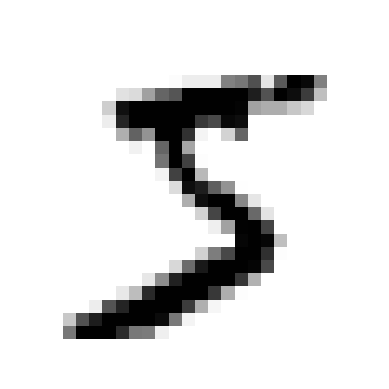

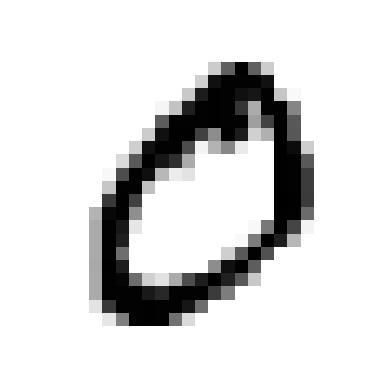

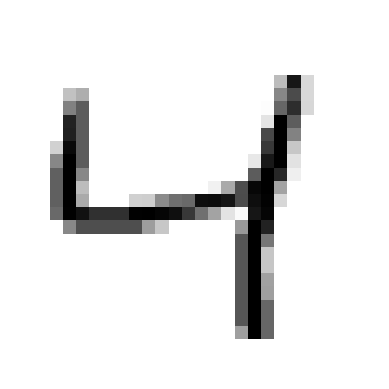

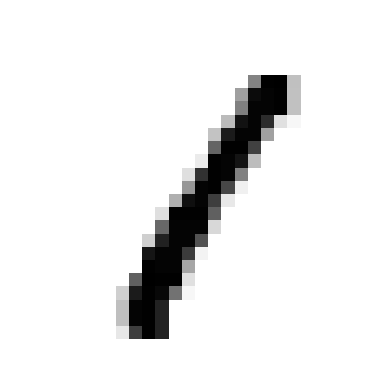

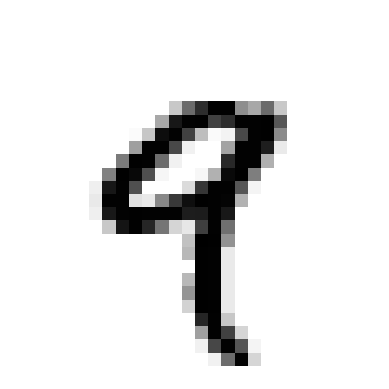

In [4]:
import matplotlib.pyplot as plt

for i in range(5):
  image = X[i, 0]
  plt.imshow(image, cmap = "binary")
  plt.axis("off")
  plt.show()

# Model

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, hidden_units):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
model = CNN(100)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [8]:
def train(model, optimizer, criterion):
  for epoch in range(30):
    y_pred = model(X)

    loss = criterion(y_pred, y)
    print(f"Epoch: {epoch} / Loss: {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

train(model, optimizer, criterion)

Epoch: 0 / Loss: 14.508577346801758
Epoch: 1 / Loss: 25.035436630249023
Epoch: 2 / Loss: 6.499850749969482
Epoch: 3 / Loss: 2.41298246383667
Epoch: 4 / Loss: 2.3073713779449463
Epoch: 5 / Loss: 2.272169828414917
Epoch: 6 / Loss: 2.245969772338867
Epoch: 7 / Loss: 2.2217094898223877
Epoch: 8 / Loss: 2.1966521739959717
Epoch: 9 / Loss: 2.1692585945129395
Epoch: 10 / Loss: 2.1383132934570312
Epoch: 11 / Loss: 2.102504253387451
Epoch: 12 / Loss: 2.0605785846710205
Epoch: 13 / Loss: 2.0112619400024414
Epoch: 14 / Loss: 1.9532591104507446
Epoch: 15 / Loss: 1.8855093717575073
Epoch: 16 / Loss: 1.80763840675354
Epoch: 17 / Loss: 1.7196890115737915
Epoch: 18 / Loss: 1.6224194765090942
Epoch: 19 / Loss: 1.5181430578231812
Epoch: 20 / Loss: 1.4101020097732544
Epoch: 21 / Loss: 1.3019251823425293
Epoch: 22 / Loss: 1.1972295045852661
Epoch: 23 / Loss: 1.098494529724121
Epoch: 24 / Loss: 1.008210301399231
Epoch: 25 / Loss: 0.927741527557373
Epoch: 26 / Loss: 0.8572919368743896
Epoch: 27 / Loss: 0.79

In [9]:
y_pred = model(X[:5])
y_pred.shape

torch.Size([5, 10])

In [10]:
y_pred.argmax(1)

tensor([5, 0, 4, 1, 9])